In [1]:
#libraries
import math
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools
from matplotlib.colors import ListedColormap 
from matplotlib import cm
from scipy import stats
print(cm.coolwarm(0.3))



(0.6193179451882354, 0.7441207347647059, 0.9989309188196078, 1.0)


## 1. Definition of the convex quadratic function

In [2]:
A = np.matrix([[2.0, -1.0], [-1.0,2.0]]) #definite positive matrix all eigen values are greater than 0 
b = np.matrix([[4.0], [-6.0]]) # column vector  

In [3]:
#definition of the quadratic form 
def f(x, A, b):
    return float(0.5 * x.T * A * x + b.T * x)

In [4]:
#evaluation of the function in a 3d plot 
from mpl_toolkits.mplot3d import axes3d
def bowl(A, b):
    fig = plt.figure(figsize=(10,8))
    qf = fig.gca(projection='3d')
    size = 20
    x1 = list(np.linspace(-10, 10, size))
    x2 = list(np.linspace(-10, 10, size))
    x1, x2 = np.meshgrid(x1, x2)
    zs = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]], [x2[i,j]]])
            zs[i,j] = f(x, A, b)
    qf.plot_surface(x1, x2, zs, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
    qf.view_init(30,30)
    plt.title('Convex quadratic function')
    fig.show()
    return x1, x2, zs

<ipython-input-4-5e5bcc1b8873>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


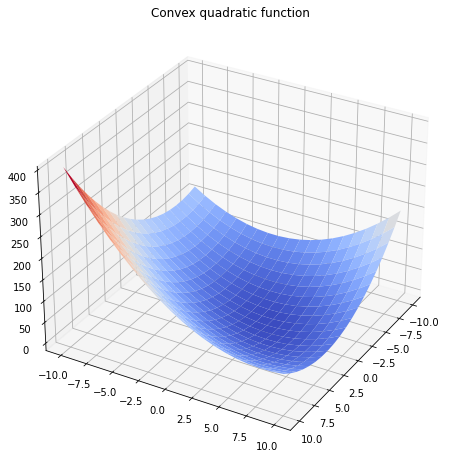

In [5]:
x1, x2, zs = bowl(A, b)



In [6]:
 

x=np.matrix([[-4.0],[-4.0]]) #starting point common to all algorithms X1,X2

y= f(x, A, b) #value of y given the starting point above 


In [7]:
y

24.0

## 2. Conjugate Gradient 

 \begin{equation} 
   \ x_{t+1}=x_t- \langle\ \nabla f(x_t),p_t\rangle\ \frac{p_t}{ || p_t ||^2_A  } \\
   where\ \{p_0,p_1\}\ the\ \ conjugate \ \ vector\ \ is \ an \ orthogonal\ set\ for\ \langle\cdot,\cdot\rangle_A \ \
  \end{equation}

  \begin{equation} 
   at\ the\ starting\ point\ t=0, \  p_0=\nabla f(x_0)\\
   so\ the\ next\ step\ will\ be\ x_1=x_0- \langle\ \nabla f(x_o),\nabla f(x_0)\rangle\ \frac{\nabla f(x_0)}{ \langle\ \nabla f(x_o),\nabla f(x_0)\rangle_A  } = x_0- \frac{\langle\ \nabla f(x_o),\nabla f(x_0)\rangle}{\langle\ \nabla f(x_o),\nabla f(x_0)\rangle_A }\ \nabla f(x_0) 
  \end{equation}
  
  
 \begin{equation} 
   for\  t ≥ 1, \ p_t=\nabla f(x_t) +\frac{\langle\ \nabla f(x_t),\nabla f(x_t)\rangle}{\langle\ \nabla f(x_{t-1}),\nabla f(x_{t-1})\rangle }\ p_{t-1}  
  \end{equation}
  
   \begin{equation} 
   then\ p_1=\nabla f(x_1) +\frac{\langle\ \nabla f(x_1),\nabla f(x_1)\rangle}{\langle\ \nabla f(x_0),\nabla f(x_0)\rangle }\ p_0  
  \end{equation}
  
   \begin{equation} 
   in\ \ the \ \ function \ \ \frac{\langle\ \nabla f(x_1),\nabla f(x_1)\rangle}{\langle\ \nabla f(x_0),\nabla f(x_0)\rangle } \ \ is \ \ identified \ \ by \  \ beta   
  \end{equation}
  
  \begin{equation} 
   by\ applying\ \langle\ \nabla f(x_1), p_1\rangle =\langle\ \nabla f(x_1),\nabla f(x_1)\rangle
  \end{equation}
  
  \begin{equation} 
    x_2 = x_1- \frac{\langle\ \nabla f(x_1),\nabla f(x_1)\rangle}{\langle p_1 , p_1\rangle_A }\ p_1 
  \end{equation}
  
  \begin{equation} 
    in\ \ the \ \ function \ \ \frac{\langle\ \nabla f(x_1),\nabla f(x_1)\rangle}{\langle p_1 , p_1\rangle_A } \ \ is \ \ identified \ \ by\ \ alpha 
  \end{equation}

In [8]:
#conjugate gradients function  
def conjugate_method(A, b,x,y):
 #starting point equal for all algorithms:
        #x1,x2
    stepsCM=[(-4.0, -4.0)]
        #y
    stepsyCM=[(y)]
    #initialize iteration 
    i = 0
    #number of max iteration 
    imax = 2 # quadratic function max number of iteration equal to 2 
    #gradient  
    r = b + A * x
    #initialize the conjugate vector 
    d = r 
    #inner product 
    deltanew = r.T * r
    #stopping criteria n° of max iteration reached.
    while i < imax:
        alpha = float(deltanew / float(d.T * (A * d))) #estimation of alpha 
        x = x - alpha * d #next step 
        stepsCM.append((x[0, 0], x[1, 0])) # store steps for future drawing X1 and X2
        matrix=np.matrix([[x[0,0]],[x[1,0]]]) #matrix of current x1 and x2 to compute the function
        stepsyCM.append(f(matrix, A, b)) #store steps for y 
        r = b + A * x #update the gradient 
        deltaold = deltanew #denominator of beta  
        deltanew = r.T * r #numerator of beta 
        beta = float(deltanew / float(deltaold)) #compute beta 
        d = r + beta * d  #update the conjugate vector 
        i += 1
    return stepsCM,stepsyCM

In [9]:
#point reached at each iteration
conjugate_method(A,b,x,y)

([(-4.0, -4.0), (-4.0, 1.0), (-0.666666666666667, 2.6666666666666665)],
 [24.0, -1.0, -9.333333333333334])

In [10]:
#number of step to reach the minimum 
len(conjugate_method(A,b,x,y)[0])-1 

2

## 3.  Descent Gradient 

 \begin{equation} 
   \ x_{t+1}=x_t-\alpha_{DG} \nabla f(x_t) \\
    \end{equation}




stopping criteria:  
  \begin{equation} 
  \langle\ \nabla f(x_t),\nabla f(x_t)\rangle < (0.001)^2 \langle\ \nabla f(x_0),\nabla f(x_0)\rangle
    \end{equation}
    

In [11]:
#descent gradient function
def descent_gradient(A, b,x,y):
    #starting point equal for all algorithms:
        #x1,x2
    stepsDG=[(-4.0, -4.0)]
        #y
    stepsyDG=[(y)]
    #initialize iteration 
    i = 0
    #number of max iteration 
    imax = 10000
    #tolerance level 
    eps = 0.001
    #learning rate
    alpha = 0.25 
    #the gradient 
    r = b + A * x
    #inner product for the stopping criteria 
    delta = r.T * r
    #inner product at the first iteration 
    delta0 = delta
    #stopping criteria 
    while delta > eps**2 * delta0:
        x = x - alpha * r
        stepsDG.append((x[0,0], x[1,0]))  # store steps for future drawing X1 and X2 
        matrix=np.matrix([[x[0,0]],[x[1,0]]]) #matrix of current x1 and x2 to compute the function
        stepsyDG.append(f(matrix, A, b)) #store y
        r = b + A * x #update the gradient 
        delta = r.T * r # update the inner product for the stopping criteria 
        i += 1
    return stepsDG,stepsyDG

In [12]:
#number of steps to reach the minimum  
len(descent_gradient(A,b,x,y)[0])-1

23

## 4. Newton's Method 

 \begin{equation} 
   \ x_{t+1}=x_t-\alpha_{NM} H^{-1} f(x_t) \nabla f(x_t) \\
    \end{equation}



stopping criteria:
\begin{equation} 
  \langle\ H^{-1}f(x_t)\nabla f(x_t),H^{-1}f(x_t)\nabla f(x_t)\rangle < (0.001)^2 \langle\ H^{-1}f(x_0)\nabla f(x_0),H^{-1}f(x_0)\nabla f(x_0)\rangle
    \end{equation}

In [13]:
#Newton method function 
def newton_method(A,b,x,y):
#starting point equal for all algorithms:
        #x1,x2
    stepsNM=[(-4.0, -4.0)]
        #y
    stepsyNM=[(y)]
    i = 0
    #inverse of the hessian
    h_=np.linalg.inv(A)
    #early stopping at 10000 iterations
    imax = 10000
    eps = 0.001
    alpha = 0.35  
    #gradient 
    #inverse of the hessian* gradient 
    r = h_*(b + A * x)
    #stopping criteria 
    delta = r.T * r
    delta0 = delta
    #the current gradient squared lower than 1/10000 * the initial gradient squared or n° of max iteration reached.
    while  delta > eps**2 * delta0:
        x = x - alpha * r
        stepsNM.append((x[0,0], x[1,0]))  # store steps for future drawing x1 and x2 
        matrix=np.matrix([[x[0,0]],[x[1,0]]]) #matrix of current x1 and x2 to compute the function
        stepsyNM.append(f(matrix, A, b)) #store steps for y 
        r = h_*(b + A * x)
        delta = r.T * r
        i += 1
    return stepsNM,stepsyNM 

In [14]:
len(newton_method(A,b,x,y)[0])-1

17

## 5. Comparison Conjugate Method, Descent Gradient, Newton's Method 

In [15]:
# define the isocurve of the function for the convergence of Descent gradient, Conjugate Method, Newton's Method 
#visualize the trajectories from the starting point to the minimum.
def countsteps(x1, x2, zs, stepsDG=None,stepsCM=None,stepsNM=None):
    fig = plt.figure(figsize=(10,8))
    cp = plt.contour(x1, x2, zs, 8)
    plt.clabel(cp, inline=1, fontsize=8)
    plt.plot(-2/3,8/3,'ro',label='Optim')
    if (stepsDG is not None) and(stepsCM is not None) and (stepsNM is not None):
        stepsDG = np.matrix(stepsDG)
        stepsCM=np.matrix(stepsCM)
        stepsNM=np.matrix(stepsNM)
        plt.plot(stepsDG[:,0], stepsDG[:,1], 'g^-', label='Descent gradient')
        plt.plot(stepsCM[:,0], stepsCM[:,1], 'p--',label='Conjugate method')
        plt.plot(stepsNM[:,0], stepsNM[:,1], 'ys-',label='Newton method')
        plt.plot(-4,-4,'ro',label='Starting Point')
    plt.legend()
    fig.show()

<ipython-input-15-78cb51157662>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


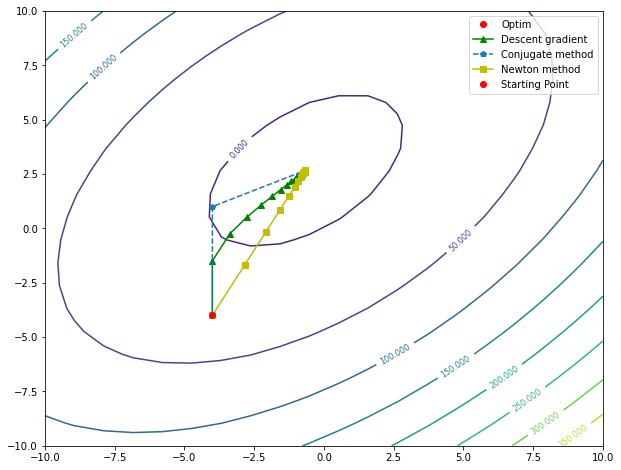

In [16]:
countsteps(x1, x2, zs, descent_gradient(A,b,x,y)[0],conjugate_method(A,b,x,y)[0],newton_method(A,b,x,y)[0])

In [17]:
# minimum of the function in:  
optim=(-2/3,8/3,-28/3)
optimal=list(optim)
optimal 

[-0.6666666666666666, 2.6666666666666665, -9.333333333333334]

## 6.  Experiment  

In [18]:
#learnig rate for descent gradient 
alphaDG = 0.25 # 0.25,0.35,0.4,0.45
#learning rate for newton's method 
alphaNM=0.5 # 0.5,0.55,0.6,0.7
#initialize the list in which are stored p.values of the system of hypothesis
# descent gradient vs conjugate method 
pvalueDG=[]
# newton's method vs conjugate method
pvalueNM=[]

#radius of the neighbourhood
R=10 # 10,20
#
PI=math.pi
#first loop compute the p.value 10 times 
for j in range(10):
    #initialize the list containing distances between first step conjugate method and the minimum 
    eDistance1CM=[]
    #initialize the list containing distances between first step descent gradient and the minimum
    eDistance1DG=[]
    #initialize the list containing distances between first newton's method and the minimum
    eDistance1NM=[]
    
    #second loop generate 30 random points in the neighbourhood of the minimum + distances between first iteration of each algorithm and the minimum
    for i in range(30):
        # angle for the creation of the coordinates
        theta = np.random.uniform(0,1) * 2 * PI
        # circonference in which pick up the point 
        r = R * math.sqrt(np.random.uniform(0,1))
        # first coordinate translated to have the minimum as center of the circle   
        x1 = r * math.cos(theta)-2/3
        #second coordinate translated to have the minimum as center of the circle 
        x2 = r * math.sin(theta)+8/3
        x=np.matrix([[x1],[x2]]) #starting point common to all algorithms x1, x2
        # first step descent gradient 
        r = b + A * x #gradient 
        DG = x - alphaDG * r #first step 
        matrixDG=np.matrix([[DG[0,0]],[DG[1,0]]]) #matrix of current x1 and x2 to compute the function
        yDG=(f(matrixDG, A, b)) #store f(x, A, b) value of y given current x1 and x2 
        steps1DG=((DG[0,0], DG[1,0],yDG))  # store first step  x1, x2 and y given a certain starting point  
        distDG=math.dist(steps1DG,optimal) # compute the distance from the minimum 
        eDistance1DG.append(distDG) # append to the list
        # first step conjugate method
        d = r  # first conjugate vector equal to the gradient of the starting point  
        deltanew = r.T * r  
        alphaCM = float(deltanew / float(d.T * (A * d)))
        CM = x - alphaCM * d #first step 
        matrixCM=np.matrix([[CM[0,0]],[CM[1,0]]]) #matrix of current x1 and x2 to compute the function
        yCM=(f(matrixCM, A, b)) #store store f(x, A, b) value of y given current x1, x2  
        steps1CM=((CM[0, 0], CM[1, 0],yCM)) # store first step x1, x2 and y1 given a certain starting point 
        distCM=math.dist(steps1CM,optimal) #compute the distance from the minimum 
        eDistance1CM.append(distCM) # append to the list 
        # first step newton's method
        #inverse of the hessian
        h_=np.linalg.inv(A)
        r1 = h_*(A * x + b)
        NM = x - alphaNM * r1 #first step 
        matrixNM=np.matrix([[NM[0,0]],[NM[1,0]]]) #matrix of current x1 and x2 to compute the function
        yNM=(f(matrixNM, A, b)) #store store f(x, A, b) value of y given current x1, x2 
        steps1NM=((NM[0,0], NM[1,0],yNM)) # store first step x1, x2 and y1 given a certain starting point  
        distNM=math.dist(steps1NM,optimal) # compute the distance from the minimum 
        eDistance1NM.append(distNM) # append to list 
    #p.value for conjugate method's distances and descent gradient's distances 
    currentpvalueDG=scipy.stats.mannwhitneyu(eDistance1CM, eDistance1DG, alternative='less').pvalue # alternative less /two sided 
    # p.value for conjugate method's distances and newton's method's distances 
    currentpvalueNM=scipy.stats.mannwhitneyu(eDistance1CM, eDistance1NM, alternative='two-sided').pvalue # alternative less / two sided 
    # append all p. values coming from different samples 
    pvalueDG.append(currentpvalueDG)
    pvalueNM.append(currentpvalueNM)

In [19]:
#mean of the p.value lists 
np.mean(pvalueDG), np.mean(pvalueNM)

(0.00032369260995560283, 8.730989720046572e-05)

## 6. Analysis of the samples created 
 

- Conjugate Method

In [20]:
eDistance1CM=pd.DataFrame(eDistance1CM)

<AxesSubplot:ylabel='Density'>

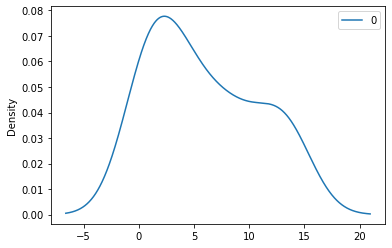

In [21]:
eDistance1CM.plot.density()

In [22]:
eDistance1CM.mean(),eDistance1CM.var(), eDistance1CM.min()

(0    5.880208
 dtype: float64,
 0    22.829482
 dtype: float64,
 0    0.282997
 dtype: float64)

- Descent gradient 

In [23]:
eDistance1DG=pd.DataFrame(eDistance1DG)

<AxesSubplot:ylabel='Density'>

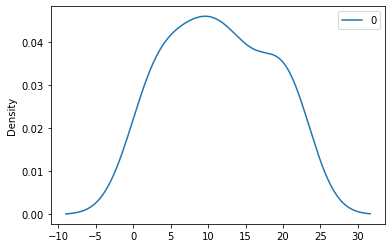

In [24]:
eDistance1DG.plot.density()

In [25]:
eDistance1DG.mean(),eDistance1DG.var(), eDistance1DG.min() 

(0    11.408855
 dtype: float64,
 0    45.104712
 dtype: float64,
 0    1.170081
 dtype: float64)

- Newton Method

In [26]:
eDistance1NM=pd.DataFrame(eDistance1NM)

<AxesSubplot:ylabel='Density'>

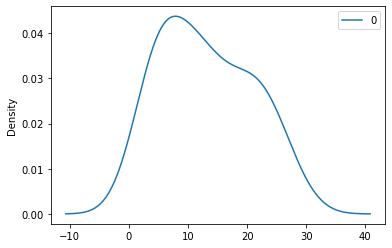

In [27]:
eDistance1NM.plot.density()

In [28]:
eDistance1NM.mean(),eDistance1NM.var(), eDistance1NM.mean()

(0    13.069723
 dtype: float64,
 0    58.091578
 dtype: float64,
 0    13.069723
 dtype: float64)

Check for gaussianity with Shapiro-Wilk test  

In [29]:
scipy.stats.shapiro(eDistance1CM)

ShapiroResult(statistic=0.8894801139831543, pvalue=0.004689247813075781)

In [30]:
scipy.stats.shapiro(eDistance1DG)

ShapiroResult(statistic=0.9289482831954956, pvalue=0.04604746773838997)

In [31]:
scipy.stats.shapiro(eDistance1NM)

ShapiroResult(statistic=0.9430434703826904, pvalue=0.10986687988042831)